In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e2/sample_submission.csv
/kaggle/input/playground-series-s3e2/train.csv
/kaggle/input/playground-series-s3e2/test.csv
/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e2/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e2/test.csv')
ss = pd.read_csv('/kaggle/input/playground-series-s3e2/sample_submission.csv')
another_df = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
train_df
# another_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [4]:
train_df.drop('id', axis=1, inplace=True)
another_df.drop('id', axis=1, inplace=True)

In [5]:
another_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
another_df = another_df[another_df['stroke'] == 1]
another_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [7]:
another_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             249 non-null    object 
 1   age                249 non-null    float64
 2   hypertension       249 non-null    int64  
 3   heart_disease      249 non-null    int64  
 4   ever_married       249 non-null    object 
 5   work_type          249 non-null    object 
 6   Residence_type     249 non-null    object 
 7   avg_glucose_level  249 non-null    float64
 8   bmi                209 non-null    float64
 9   smoking_status     249 non-null    object 
 10  stroke             249 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 23.3+ KB


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


In [9]:
train_df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [10]:
# เชื่อม dataframe 
train_df = pd.concat([train_df, another_df],axis=0, ignore_index=True)
train_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15548,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
15549,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
15550,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
15551,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [11]:
train_df.isna().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  40
smoking_status        0
stroke                0
dtype: int64

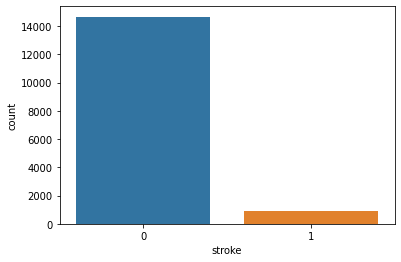

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'stroke', data = train_df)
plt.show()

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

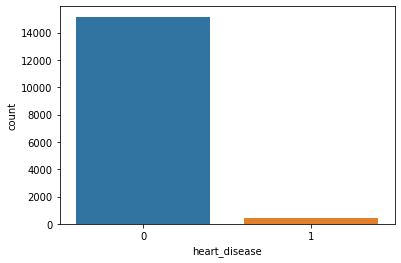

In [13]:
sns.countplot(x = 'heart_disease', data = train_df)

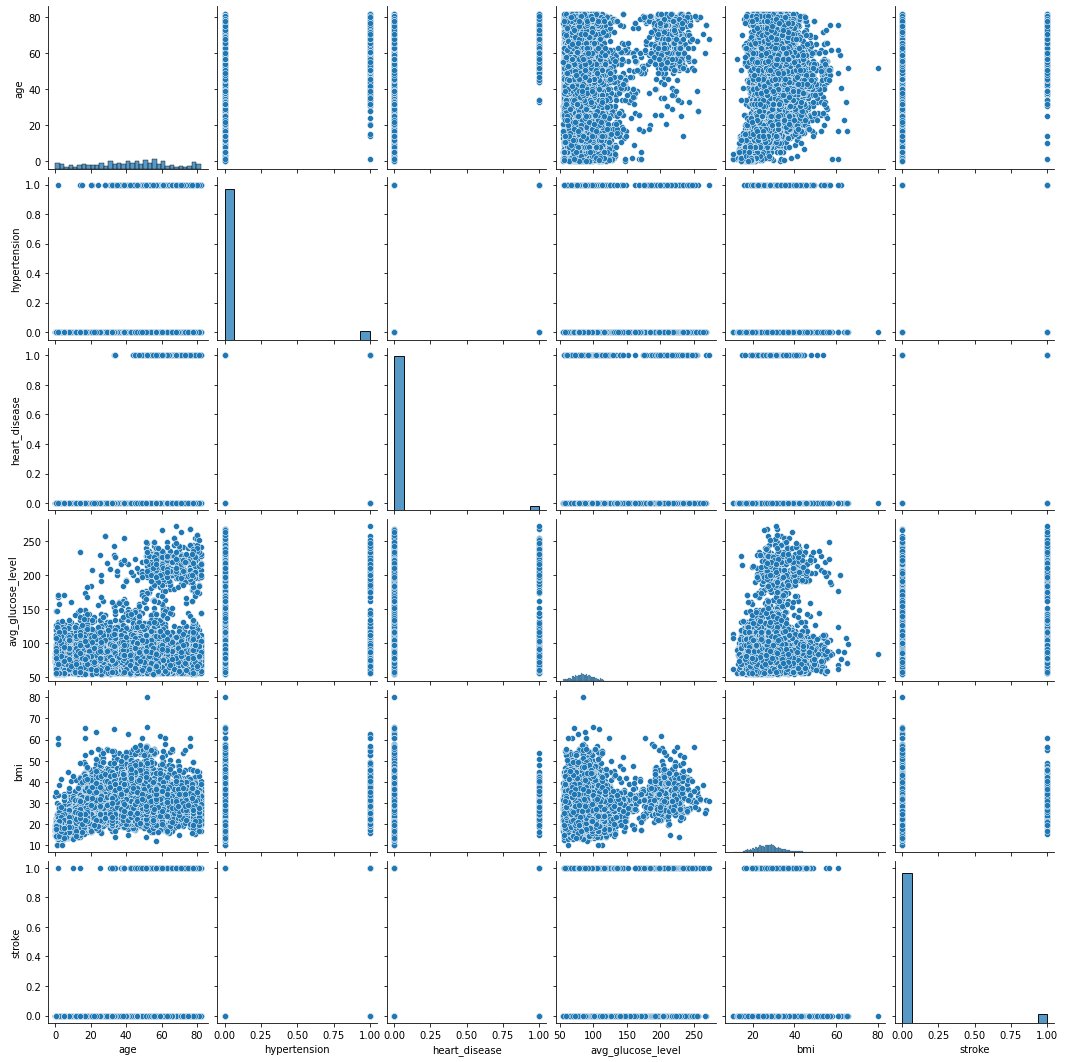

In [14]:
sns.pairplot(train_df)

<AxesSubplot:>

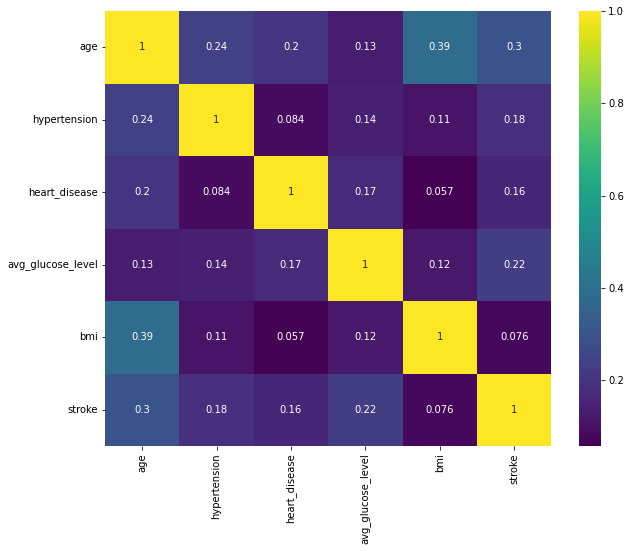

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cmap='viridis')

<AxesSubplot:xlabel='age', ylabel='bmi'>

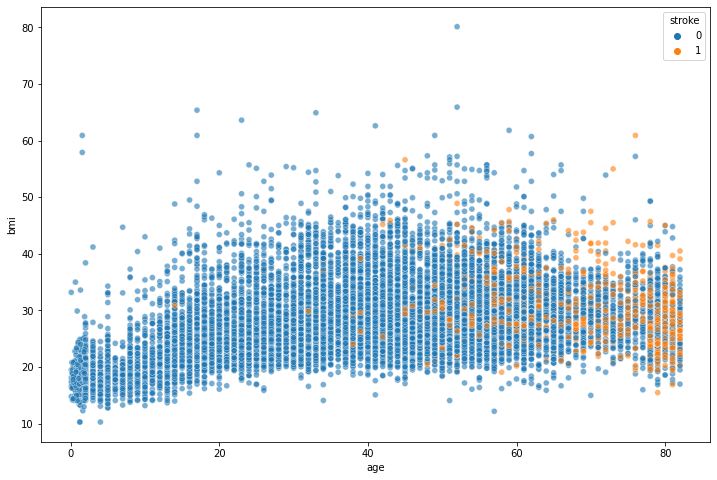

In [16]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='bmi', data=train_df, hue='stroke', alpha=0.6)

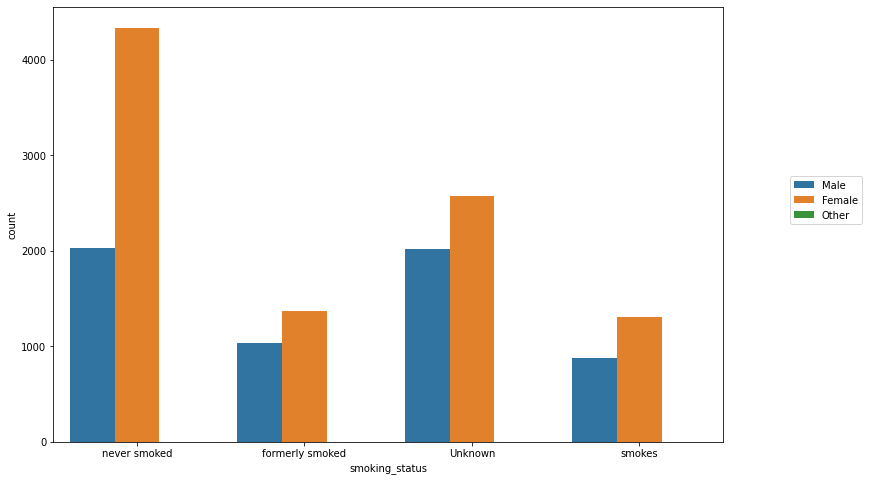

In [17]:
plt.figure(figsize=(12, 8))
sns.countplot(hue='gender', x='smoking_status', data=train_df)
plt.legend(loc=(1.1,0.5))
plt.show()

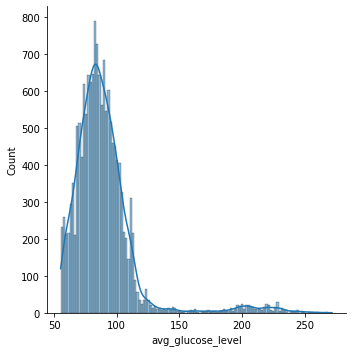

In [18]:
sns.displot(x='avg_glucose_level', data=train_df, kde=True)
plt.show()

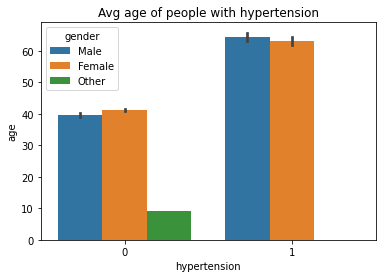

In [19]:
sns.barplot(x='hypertension', y='age', data=train_df, estimator=np.mean, hue='gender')
plt.title("Avg age of people with hypertension")
plt.show()

<AxesSubplot:xlabel='ever_married', ylabel='Count'>

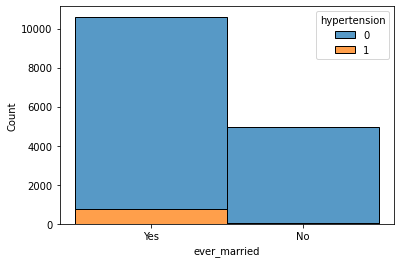

In [20]:
sns.histplot(binwidth=0.5, hue="hypertension", x="ever_married", data=train_df, stat="count", multiple="stack")

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

x_full = train_df.copy()
y_full = x_full.pop('stroke').to_numpy()
print(y_full)
print(x_full)

num_cols = ["age", "avg_glucose_level", "bmi"]
cat_cols = x_full.columns.difference(num_cols)
print(cat_cols)

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

tr = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", OneHotEncoder(drop="first"), cat_cols),
])

x_full = tr.fit_transform(x_full)
x_test = tr.transform(test_df)

print(x_full[0])
print("train shape = ", x_full.shape)
print("test shape = ", x_test.shape)

[0 0 0 ... 1 1 1]
       gender   age  hypertension  heart_disease ever_married      work_type  \
0        Male  28.0             0              0          Yes        Private   
1        Male  33.0             0              0          Yes        Private   
2      Female  42.0             0              0          Yes        Private   
3        Male  56.0             0              0          Yes        Private   
4      Female  24.0             0              0           No        Private   
...       ...   ...           ...            ...          ...            ...   
15548    Male  57.0             0              0          Yes        Private   
15549  Female  14.0             0              0           No       children   
15550  Female  75.0             0              0          Yes  Self-employed   
15551    Male  71.0             1              0          Yes  Self-employed   
15552  Female  78.0             0              0          Yes        Private   

      Residence_type 

In [22]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(256, input_dim=16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

2023-01-16 05:06:38.618853: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 05:06:38.721024: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 05:06:38.721781: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 05:06:38.724655: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [23]:
import tensorflow_addons as tfa

model.compile(loss=tfa.losses.SigmoidFocalCrossEntropy(alpha=0.80, gamma=2.0), optimizer='adam', metrics="AUC")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               4352      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6

In [24]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_auc', mode='max', factor=0.1, patience=2, min_lr=1e-6, min_delta=0.0001)

es = EarlyStopping(monitor="val_auc", mode='max', patience=10, min_delta=0.0001, restore_best_weights = True)

In [25]:
# from sklearn.model_selection import train_test_split, StratifiedKFold

# x_train, x_valid, y_train, y_valid = train_test_split(x_full, y_full, test_size=0.20, random_state=0)

# print(x_train.shape, y_train.shape)
# print(x_valid.shape, y_valid.shape)

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score

models = []
score = []

k = StratifiedKFold(n_splits=12, random_state=228, shuffle=True)
for fold, (train_idx, val_idx) in enumerate(k.split(x_full, y_full)):
    x_train, x_valid = x_full[train_idx], x_full[val_idx]
    y_train, y_valid = y_full[train_idx], y_full[val_idx]    
    
    hist = model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs = 300, batch_size = 64, 
            callbacks = [reduce_lr, es], class_weight = { 0: 1, 1: 10}, verbose=0).history
    
    s = roc_auc_score(y_valid, model.predict(x_valid))
    print(f"Best val auc: {s:.4f}")
    score.append(s)
    models.append(model)
    
print(f'mean scores:  {np.mean(score):.4f}')

2023-01-16 05:06:41.718973: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Best val auc: 0.8898
Best val auc: 0.8744
Best val auc: 0.8865
Best val auc: 0.9058
Best val auc: 0.8928
Best val auc: 0.8916
Best val auc: 0.9280
Best val auc: 0.9171
Best val auc: 0.8875
Best val auc: 0.9141
Best val auc: 0.8950
Best val auc: 0.8881
mean scores:  0.8976


In [27]:
# plot_history(hist, met="auc", best_min=False)

In [28]:
score = model.evaluate(x_valid, y_valid)
print(score)

41/41 [==============================] - 0s 4ms/step - loss: 0.0358 - auc: 0.8881
[0.03581387549638748, 0.8881431221961975]


In [29]:
test_preds = []

for model in models:
    preds = model.predict(x_test)
    test_preds.append(preds)

In [30]:
test_preds = np.array(test_preds).mean(0)
print(test_preds)

[[0.5716659 ]
 [0.70463985]
 [0.15104814]
 ...
 [0.10018226]
 [0.30150178]
 [0.09115056]]


In [31]:
ss['stroke'] = test_preds
ss.to_csv("submission.csv", index=False)
pd.read_csv("submission.csv").head()

,id,stroke
0,15304,0.571666
1,15305,0.704640
2,15306,0.151048
3,15307,0.585917
4,15308,0.427372
